/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 - 4s - 2s/step - accuracy: 0.4384 - loss: 0.7315 - val_accuracy: 0.5405 - val_loss: 0.6923
Epoch 2/10
2/2 - 1s - 385ms/step - accuracy: 0.5411 - loss: 0.7086 - val_accuracy: 0.5135 - val_loss: 0.6736
Epoch 3/10
2/2 - 0s - 80ms/step - accuracy: 0.6164 - loss: 0.6585 - val_accuracy: 0.5676 - val_loss: 0.6597
Epoch 4/10
2/2 - 0s - 172ms/step - accuracy: 0.6370 - loss: 0.6466 - val_accuracy: 0.6757 - val_loss: 0.6487
Epoch 5/10
2/2 - 0s - 149ms/step - accuracy: 0.6712 - loss: 0.6435 - val_accuracy: 0.6757 - val_loss: 0.6402
Epoch 6/10
2/2 - 0s - 105ms/step - accuracy: 0.6918 - loss: 0.6397 - val_accuracy: 0.6757 - val_loss: 0.6323
Epoch 7/10
2/2 - 0s - 75ms/step - accuracy: 0.7123 - loss: 0.6169 - val_accuracy: 0.6757 - val_loss: 0.6255
Epoch 8/10
2/2 - 0s - 142ms/step - accuracy: 0.7329 - loss: 0.6099 - val_accuracy: 0.6757 - val_loss: 0.6202
Epoch 9/10
2/2 - 0s - 106ms/step - accuracy: 0.7192 - loss: 0.5859 - val_accuracy: 0.6757 - val_loss: 0.6156
Epoch 10/10
2/2 - 0s - 1

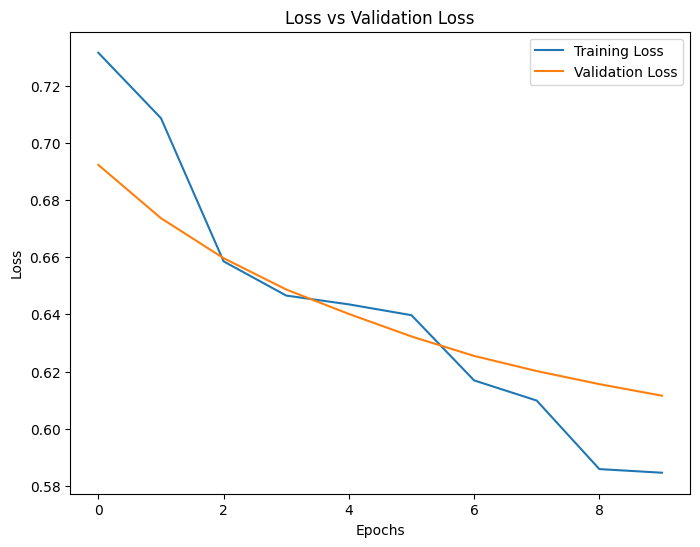

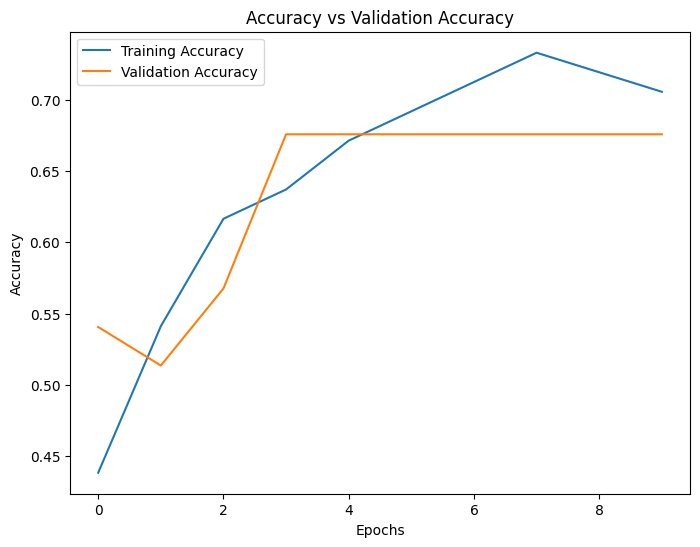

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


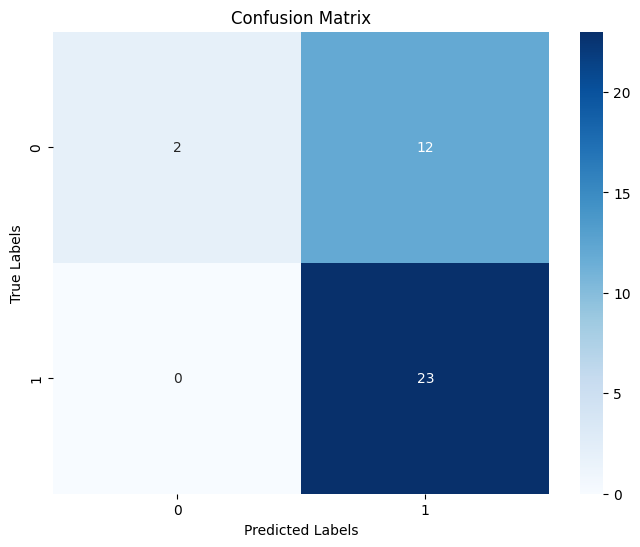

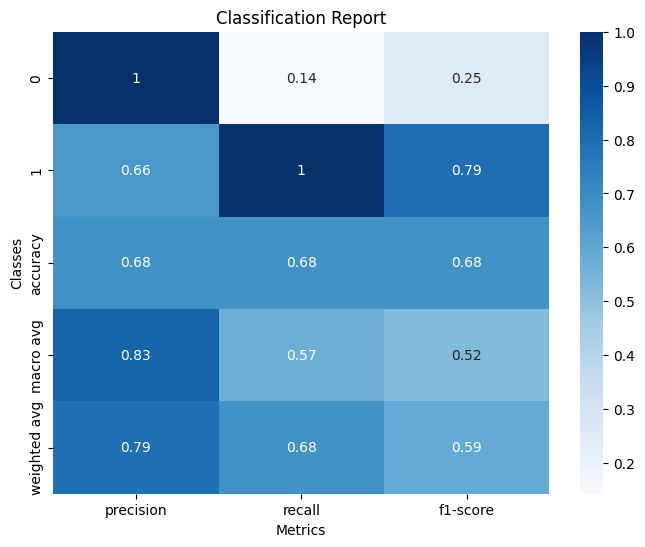

Confusion Matrix:
[[ 2 12]
 [ 0 23]]

Parameters:
True Positives (TP): 23
True Negatives (TN): 2
False Positives (FP): 12
False Negatives (FN): 0
Accuracy: 0.676
Precision: 0.657
Recall: 1.000
F1-score: 0.793

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.66      1.00      0.79        23

    accuracy                           0.68        37
   macro avg       0.83      0.57      0.52        37
weighted avg       0.79      0.68      0.59        37



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Drop NaN values
df = df.dropna()

# Preprocess data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Convert target variable to categorical
le = LabelEncoder()
df['Survived'] = le.fit_transform(df['Survived'])

# Split data into training and testing sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=2)

# Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



# Evaluate model
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(y_test_class, y_pred_class)

# Calculate parameters
TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

Accuracy = accuracy_score(y_test_class, y_pred_class)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

# Classification Report
report = classification_report(y_test_class, y_pred_class, output_dict=True)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot Classification Report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.show()

print("Confusion Matrix:")
print(conf_mat)
print("\nParameters:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {Accuracy:.3f}")
print(f"Precision: {Precision:.3f}")
print(f"Recall: {Recall:.3f}")
print(f"F1-score: {F1_score:.3f}")
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Drop NaN values
df = df.dropna()

# Preprocess data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)



In [3]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,1,38.0,1,0,71.2833,1
3,4,1,1,1,35.0,1,0,53.1000,0
6,7,0,1,0,54.0,0,0,51.8625,0
10,11,1,3,1,4.0,1,1,16.7000,0
11,12,1,1,1,58.0,0,0,26.5500,0
...,...,...,...,...,...,...,...,...,...
871,872,1,1,1,47.0,1,1,52.5542,0
872,873,0,1,0,33.0,0,0,5.0000,0
879,880,1,1,1,56.0,0,1,83.1583,1
887,888,1,1,1,19.0,0,0,30.0000,0


#Label Encoder: Why Use on Target Variable?
Label Encoder is used on the target variable to convert categorical labels into numerical labels that can be understood by machine learning algorithms.
#Why is Label Encoding necessary?
1. Machine Learning Algorithms: Most algorithms require numerical inputs.
2. Categorical Data: Target variables are often categorical (e.g., classes, labels).
3. Conversion Needed: Label Encoder converts categorical labels to numbers.
#Benefits of Label Encoding:
1. Algorithm Compatibility: Enables algorithms to process categorical data.
2. Efficient Data Representation: Reduces data dimensionality.
3. Improved Model Performance: Enhances model accuracy.

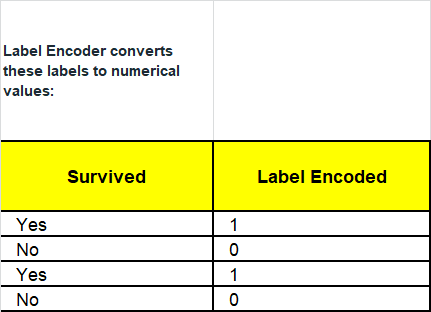

#Common Label Encoding Techniques:
1. Ordinal Encoding: Assigns ordered values (e.g., 1, 2, 3).
2. One-Hot Encoding: Creates binary vectors (e.g., [1, 0, 0]).
#When to Use Label Encoder:
1. Classification Problems: Use Label Encoder on target variable.
2. Regression Problems: Avoid using Label Encoder on target variable.
##By applying Label Encoder to the target variable, we enable machine learning algorithms to process categorical data efficiently, leading to improved model performance.

In [4]:
# Convert target variable to categorical
le = LabelEncoder()
df['Survived'] = le.fit_transform(df['Survived'])

In [5]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,1,38.0,1,0,71.2833,1
3,4,1,1,1,35.0,1,0,53.1000,0
6,7,0,1,0,54.0,0,0,51.8625,0
10,11,1,3,1,4.0,1,1,16.7000,0
11,12,1,1,1,58.0,0,0,26.5500,0


In [6]:
# Split data into training and testing sets
X = df.drop('Survived', axis=1)
y = df['Survived']
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
1              2       1    1  38.0      1      0  71.2833         1
3              4       1    1  35.0      1      0  53.1000         0
6              7       1    0  54.0      0      0  51.8625         0
10            11       3    1   4.0      1      1  16.7000         0
11            12       1    1  58.0      0      0  26.5500         0
..           ...     ...  ...   ...    ...    ...      ...       ...
871          872       1    1  47.0      1      1  52.5542         0
872          873       1    0  33.0      0      0   5.0000         0
879          880       1    1  56.0      0      1  83.1583         1
887          888       1    1  19.0      0      0  30.0000         0
889          890       1    0  26.0      0      0  30.0000         1

[183 rows x 8 columns]


In [7]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,0,45.5,0,0,28.5000,0
336,337,1,0,29.0,1,0,66.6000,0
193,194,2,0,3.0,1,1,26.0000,0
75,76,3,0,25.0,0,0,7.6500,0
248,249,1,0,37.0,1,1,52.5542,0


In [8]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
118,119,1,0,24.0,0,1,247.5208,1
251,252,3,1,29.0,1,1,10.4625,0
742,743,1,1,21.0,2,2,262.3750,1
544,545,1,0,50.0,1,0,106.4250,1
712,713,1,0,48.0,1,0,52.0000,0


In [9]:
y_train.head()

,Survived
331,0
336,0
193,1
75,0
248,1


In [10]:
y_test.head()

,Survived
118,0
251,0
742,1
544,0
712,1


#to_categorical() on y_train: Why?
1. to_categorical() is used on y_train to convert label-encoded target variables into one-hot encoded vectors.
#Why is one-hot encoding necessary?
1. Multi-Class Classification: When there are more than two classes.
2. Neural Networks: Require inputs to be numerical and normalized.
3. Softmax Activation: Outputs probabilities for each class.
#Benefits of one-hot encoding:
1. Enables Multi-Class Classification: Allows models to predict multiple classes.
2. Improves Model Accuracy: Enhances model performance.
3. Simplifies Model Implementation: Facilitates neural network architecture.
Example:
Suppose y_train has label-encoded values:

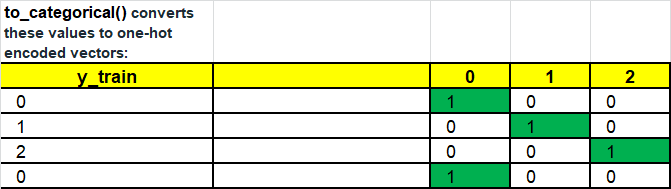

#When to use to_categorical():
1. Multi-Class Classification: Use to_categorical() on y_train.
2. Neural Networks: Use to_categorical() on y_train for softmax activation.
###By applying to_categorical() to y_train, we enable neural networks to process label-encoded target variables efficiently, leading to improved model performance in multi-class classification problems.
##Additional Tips:
Use num_classes parameter to specify the number of classes.
Use dtype parameter to specify the data type (e.g., float32).

from keras.utils import to_categorical

####Convert label-encoded y_train to one-hot encoded vectors
y_train_cat = to_categorical(y_train)

OR

y_train_cat = to_categorical(y_train, num_classes=3, dtype='float32')



In [11]:
# One-hot encode target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [13]:
X.shape[1]

8

In [14]:
# Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,722 (10.63 KB)

 Trainable params: 2,722 (10.63 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
2/2 - 5s - 3s/step - accuracy: 0.3630 - loss: 47.1645 - val_accuracy: 0.3784 - val_loss: 17.7602
Epoch 2/50
2/2 - 1s - 281ms/step - accuracy: 0.3699 - loss: 31.6782 - val_accuracy: 0.5405 - val_loss: 6.5284
Epoch 3/50
2/2 - 0s - 117ms/step - accuracy: 0.4589 - loss: 23.9489 - val_accuracy: 0.5946 - val_loss: 5.8021
Epoch 4/50
2/2 - 0s - 117ms/step - accuracy: 0.5137 - loss: 15.5865 - val_accuracy: 0.6216 - val_loss: 7.4086
Epoch 5/50
2/2 - 1s - 345ms/step - accuracy: 0.6096 - loss: 14.5765 - val_accuracy: 0.6757 - val_loss: 9.3222
Epoch 6/50
2/2 - 0s - 93ms/step - accuracy: 0.5685 - loss: 16.9389 - val_accuracy: 0.6757 - val_loss: 10.4356
Epoch 7/50
2/2 - 0s - 177ms/step - accuracy: 0.6233 - loss: 14.7441 - val_accuracy: 0.6757 - val_loss: 10.9283
Epoch 8/50
2/2 - 0s - 171ms/step - accuracy: 0.6096 - loss: 18.3803 - val_accuracy: 0.6757 - val_loss: 10.6527
Epoch 9/50
2/2 - 0s - 136ms/step - accuracy: 0.6027 - loss: 15.0457 - val_accuracy: 0.6757 - val_loss: 10.1051
Epoch 10/

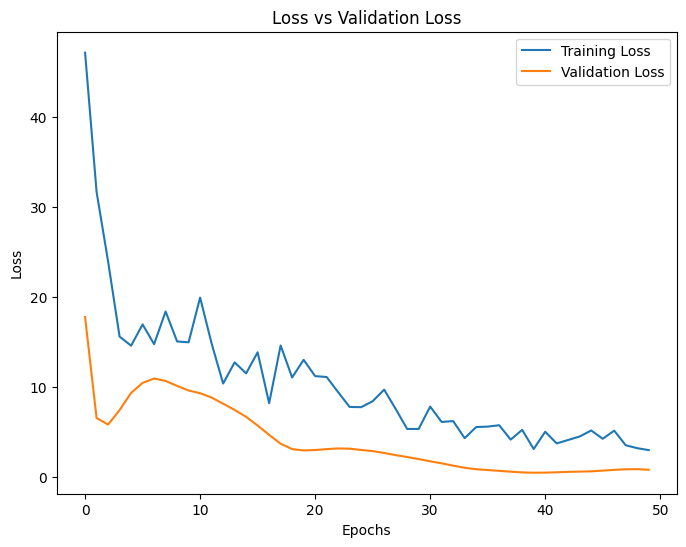

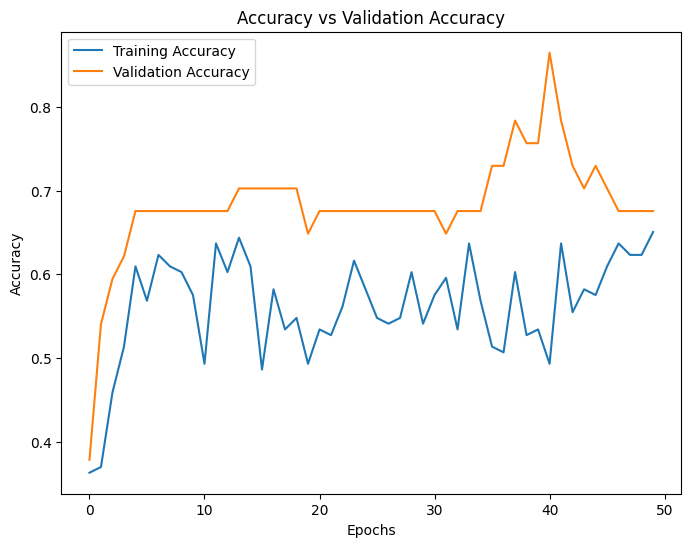

In [18]:
# Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# Evaluate model
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [20]:
y_test_class

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [21]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test_class, y_pred_class)

# Calculate parameters
TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

In [22]:
Accuracy = accuracy_score(y_test_class, y_pred_class)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

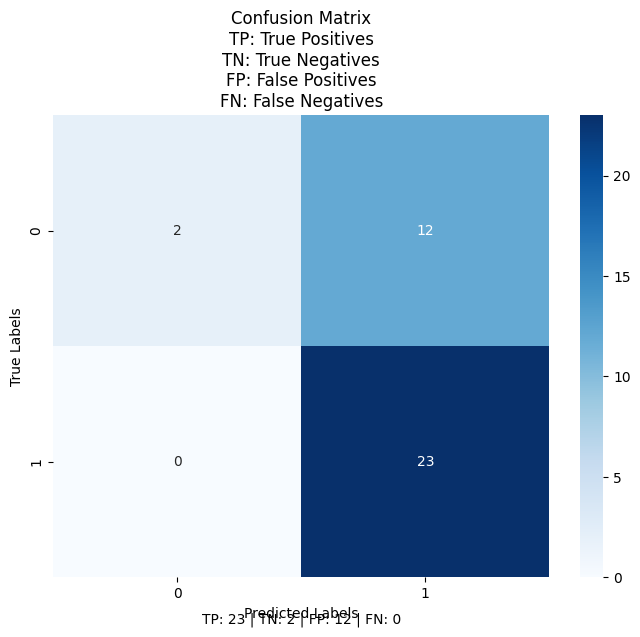

In [23]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix\nTP: True Positives\nTN: True Negatives\nFP: False Positives\nFN: False Negatives')
plt.text(0.5, -0.1, f'TP: {TP} | TN: {TN} | FP: {FP} | FN: {FN}', transform=plt.gca().transAxes, ha='center')
plt.show()

#The plot displays:
1. True Positives (TP): Correctly predicted positive classes.
2. True Negatives (TN): Correctly predicted negative classes.
3. False Positives (FP): Incorrectly predicted positive classes.
4. False Negatives (FN): Incorrectly predicted negative classes.
#This visualization helps identify:
1. Correct predictions (TP and TN)
2. Incorrect predictions (FP and FN)
###Model performance (Accuracy, Precision, Recall, F1-score)

In [24]:
print("Confusion Matrix:")
print(conf_mat)
print("\nParameters:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {Accuracy:.3f}")
print(f"Precision: {Precision:.3f}")
print(f"Recall: {Recall:.3f}")
print(f"F1-score: {F1_score:.3f}")

Confusion Matrix:
[[ 2 12]
 [ 0 23]]

Parameters:
True Positives (TP): 23
True Negatives (TN): 2
False Positives (FP): 12
False Negatives (FN): 0
Accuracy: 0.676
Precision: 0.657
Recall: 1.000
F1-score: 0.793


In [25]:
# Save model
model.save('titanic_model.h5')

# Save model weights
# Added '.weights' to the filename to adhere to Keras's naming convention
model.save_weights('titanic_model_weights.weights.h5')

In [26]:
!pip install nest_asyncio

In [27]:
!pip install fastapi uvicorn ngrok pyngrok  -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.3 MB/s eta 0:00:00


In [28]:
import os
os.environ['NGROK_AUTHTOKEN'] = '1ipY8RcMezMnSYQ92c3cgDM30BO_6c3p51cS84qmtipabtKpu'

In [32]:
from fastapi import FastAPI
import pandas as pd
import numpy as np
from keras.models import load_model
from pydantic import BaseModel
import os
from pyngrok import ngrok
import uvicorn
import nest_asyncio
import threading

# Set ngrok authtoken
os.environ['NGROK_AUTHTOKEN'] = '1ipY8RcMezMnSYQ92c3cgDM30BO_6c3p51cS84qmtipabtKpu'

app = FastAPI()

# Load saved model
model = load_model('/content/titanic_model.h5')

class TitanicData(BaseModel):
    Age: int
    Sex: str
    Embarked: str
    Pclass: int
    SibSp: int
    Parch: int
    Fare: float

@app.post("/predict")
async def predict(data: TitanicData):
    # Create DataFrame from input data
    df = pd.DataFrame([data.dict()])

    # Preprocess input data
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # Make predictions
    predictions = model.predict(df)

    # Return predictions as JSON
    return {"prediction": np.argmax(predictions)}

# Run FastAPI app
if __name__ == "__main__":
    nest_asyncio.apply()
    # Added code to list and close existing tunnels
    tunnels = ngrok.get_tunnels()
    for tunnel in tunnels:
        print(f"Closing tunnel: {tunnel.public_url}")
        ngrok.disconnect(tunnel.public_url)
    # Connect and establish new tunnel
    http_tunnel = ngrok.connect(8002)
    print(f"NGrok Tunnel: {http_tunnel.public_url}")

    def run_uvicorn():
        uvicorn.run(app, host="0.0.0.0", port=8003)

    threading.Thread(target=run_uvicorn).start()

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-4' coro=<Server.serve() done, defined at /usr/local/lib/python3.10/dist-packages/uvicorn/server.py:67> exception=SystemExit(1)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 162, in startup
    server = await loop.create_server(
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1519, in create_server
    raise OSError(err.errno, 'error while attempting '
OSError: [Errno 98] error while attempting to bind on address ('0.0.0.0', 8002): address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-31-d7e76ed796ea>", line 57, in run_uvicorn
    uvicorn.run(app,

Closing tunnel: https://03b3-35-231-55-237.ngrok-free.app
NGrok Tunnel: https://c1d1-35-231-55-237.ngrok-free.app


INFO:     Started server process [299]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8003 (Press CTRL+C to quit)


In [30]:
!curl -X POST -H "Content-Type: application/json" -d '{"Age": 30, "Sex": "male", "Embarked": "S", "Pclass": 1, "SibSp": 0, "Parch": 0, "Fare": 100.0}' http://localhost:8000/predict

INFO:     Started server process [299]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8002 (Press CTRL+C to quit)


curl: (7) Failed to connect to localhost port 8000 after 0 ms: Connection refused


In [ ]:
from fastapi import FastAPI
import pandas as pd
import numpy as np
from keras.models import load_model
from pydantic import BaseModel

app = FastAPI()

# Load saved model
model = load_model('/content/titanic_model.h5')

class TitanicData(BaseModel):
    Age: int
    Sex: str
    Embarked: str
    Pclass: int
    SibSp: int
    Parch: int
    Fare: float

@app.post("/predict")
async def predict(data: TitanicData):
    # Create DataFrame from input data
    df = pd.DataFrame([data.dict()])

    # Preprocess input data
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # Make predictions
    predictions = model.predict(df)

    # Return predictions as JSON
    return {"prediction": np.argmax(predictions)}

# Run FastAPI app
if __name__ == "__main__":
    import uvicorn
    ngrok_tunnel_url = !ngrok url
    print(f"NGrok Tunnel URL: {ngrok_tunnel_url}")
    uvicorn.run(app, host="0.0.0.0", port=8005)

NGrok Tunnel URL: ['ngrok - tunnel local ports to public URLs and inspect traffic', '', 'USAGE:', '  ngrok [command] [flags]', '', 'AUTHOR:', '  ngrok - <support@ngrok.com>', '', 'COMMANDS: ', "  config          update or migrate ngrok's configuration file", '  http            start an HTTP tunnel', '  tcp             start a TCP tunnel', '  tunnel          start a tunnel for use with a tunnel-group backend', '', 'EXAMPLES: ', '  ngrok http 80                                                 # secure public URL for port 80 web server', '  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev', '  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22', '  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth', '', 'Paid Features: ', '  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain', '  ngrok http 80 -

INFO:     Started server process [299]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8005 (Press CTRL+C to quit)
